Extracting Dataset using Kaggle API

In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data  sampleSubmission.csv  test1.zip  train  train.zip


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.2767.jpg', 'cat.6621.jpg', 'dog.8625.jpg', 'cat.11633.jpg', 'dog.9645.jpg', 'cat.466.jpg', 'cat.11298.jpg', 'cat.2796.jpg', 'cat.2049.jpg', 'cat.8647.jpg', 'cat.3037.jpg', 'dog.111.jpg', 'dog.10659.jpg', 'cat.2675.jpg', 'dog.10307.jpg', 'dog.12137.jpg', 'dog.2508.jpg', 'cat.6184.jpg', 'dog.12447.jpg', 'dog.9281.jpg', 'cat.3126.jpg', 'cat.10812.jpg', 'dog.7264.jpg', 'cat.7114.jpg', 'cat.3159.jpg', 'dog.4023.jpg', 'cat.7384.jpg', 'dog.4309.jpg', 'cat.8442.jpg', 'dog.113.jpg', 'dog.3754.jpg', 'dog.3299.jpg', 'cat.10816.jpg', 'dog.8815.jpg', 'cat.7109.jpg', 'dog.199.jpg', 'cat.174.jpg', 'dog.11314.jpg', 'cat.2105.jpg', 'dog.11834.jpg', 'dog.9200.jpg', 'dog.3652.jpg', 'cat.7148.jpg', 'dog.8488.jpg', 'cat.1396.jpg', 'dog.12441.jpg', 'cat.8024.jpg', 'dog.5928.jpg', 'dog.9474.jpg', 'cat.821.jpg', 'cat.10743.jpg', 'dog.10820.jpg', 'cat.1883.jpg', 'cat.11838.jpg', 'cat.11345.jpg', 'cat.11302.jpg', 'cat.9947.jpg', 'dog.10623.jpg', 'cat.105.jpg', 'cat.1973.jpg', 'cat.14.jpg', 'cat.9271.jpg',

Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

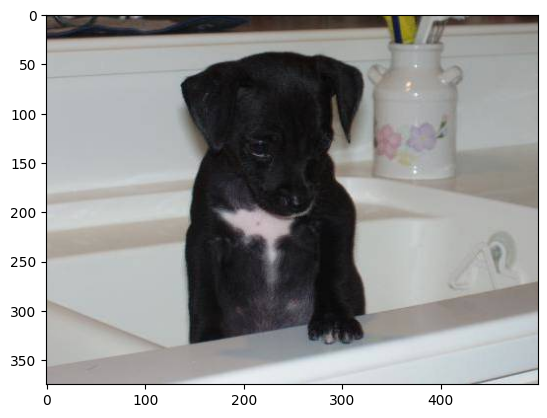

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

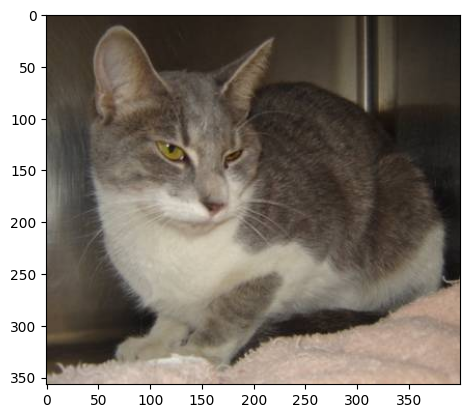

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



dog
cat
dog
cat
dog


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [ ]:

#creating a directory for resized images
if not os.path.exists('/content/image resized'):
  os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

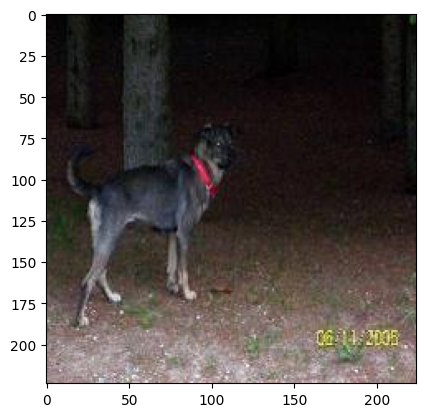

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.10147.jpg')
imgplt = plt.imshow(img)
plt.show()

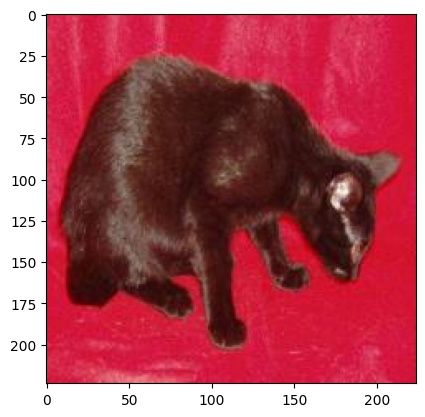

In [ ]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.10010.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.2767.jpg', 'cat.6621.jpg', 'dog.8625.jpg', 'cat.11633.jpg', 'dog.9645.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 0, 1]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1018  982]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[117 120 148]
   [108 109 135]
   [ 97  95 117]
   ...
   [192 178 182]
   [188 174 178]
   [182 168 172]]

  [[120 122 152]
   [117 118 146]
   [114 111 136]
   ...
   [192 178 182]
   [188 174 178]
   [182 168 172]]

  [[127 130 161]
   [119 121 151]
   [114 113 139]
   ...
   [192 178 182]
   [188 174 178]
   [182 168 172]]

  ...

  [[144 128 112]
   [144 128 112]
   [145 129 113]
   ...
   [123 126 140]
   [118 121 135]
   [114 117 131]]

  [[149 133 117]
   [146 130 114]
   [144 128 112]
   ...
   [123 126 140]
   [120 123 137]
   [117 120 134]]

  [[137 121 105]
   [133 117 101]
   [130 114  98]
   ...
   [124 127 141]
   [122 125 139]
   [119 122 136]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [ 97 117 134]
   [ 98 118 135]
   [100 120 137]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [ 97 117 134]
   [ 98 118 135]
   [100 120 137]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [ 97 117 134]
   [ 98 118 135]
   [100 120

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.83529412 0.9254902  0.90980392]
   [0.83529412 0.9254902  0.90980392]
   [0.83529412 0.9254902  0.90980392]
   ...
   [0.70980392 0.79215686 0.76078431]
   [0.71372549 0.79607843 0.76470588]
   [0.71372549 0.79607843 0.76470588]]

  [[0.83529412 0.9254902  0.90980392]
   [0.83529412 0.9254902  0.90980392]
   [0.83529412 0.9254902  0.90980392]
   ...
   [0.71372549 0.79607843 0.76470588]
   [0.71372549 0.79607843 0.76470588]
   [0.71764706 0.8        0.76862745]]

  [[0.83921569 0.92156863 0.90980392]
   [0.83921569 0.92156863 0.90980392]
   [0.83921569 0.92156863 0.90980392]
   ...
   [0.71764706 0.8        0.76862745]
   [0.71764706 0.8        0.76862745]
   [0.72156863 0.80392157 0.77254902]]

  ...

  [[0.07058824 0.1254902  0.12156863]
   [0.07843137 0.13333333 0.12941176]
   [0.09411765 0.14901961 0.14509804]
   ...
   [0.58039216 0.70588235 0.68627451]
   [0.57647059 0.70196078 0.68235294]
   [0.57647059 0.70196078 0.68235294]]

  [[0.11372549 0.16470588 0.17254902]
   [0.1

**Building the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 59s 1s/step - loss: 0.2023 - acc: 0.9225
Epoch 2/5
50/50 [==============================] - 56s 1s/step - loss: 0.0657 - acc: 0.9806
Epoch 3/5
50/50 [==============================] - 55s 1s/step - loss: 0.0508 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 60s 1s/step - loss: 0.0403 - acc: 0.9887
Epoch 5/5
50/50 [==============================] - 67s 1s/step - loss: 0.0340 - acc: 0.9900


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 20s 1s/step - loss: 0.0583 - acc: 0.9800
Test Loss = 0.05828460305929184
Test Accuracy = 0.9800000190734863


**Saving The model**

In [ ]:


model.save('/content/dog_cat_model')


**Loading the Model**

In [ ]:
# prompt:

model = tf.keras.models.load_model('/content/dog_cat_model')


**Predictive System**

Path of the image to be predicted: /content/image resized/cat.10010.jpg


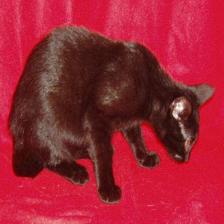

1/1 [==============================] - 1s 788ms/step
[[ 3.2857213 -2.850023 ]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

In [ ]:
import shutil
from google.colab import files

# Assuming you have saved your model to a directory named 'my_model'
model_directory_path = '/content/dog_cat_model'

# Create a zip file containing the entire folder
shutil.make_archive(model_directory_path, 'zip', model_directory_path)

# Download the zip file to your local machine
files.download(model_directory_path + '.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>